In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('spg.csv')
data.head()


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [20]:
data.isnull().sum()

data.fillna(data.mean(), inplace=True)



In [21]:
data.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [22]:
X = data[['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd', 'mean_sea_level_pressure_MSL',
    'total_precipitation_sfc', 'total_cloud_cover_sfc', 'high_cloud_cover_high_cld_lay',
    'medium_cloud_cover_mid_cld_lay', 'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
    'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd', 'wind_gust_10_m_above_gnd',
    'angle_of_incidence', 'zenith', 'azimuth']]  
y = data['generated_power_kw']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

nn_model = MLPRegressor(max_iter=500)  
nn_model.fit(X_train, y_train)


C:\Users\admin2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=500)

In [13]:
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))
print('')
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree R²:", r2_score(y_test, y_pred_tree))
print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_tree))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_tree))
print('')

y_pred_nn = nn_model.predict(X_test)
print("Neural Network R²:", r2_score(y_test, y_pred_nn))
print("Neural Network MAE:", mean_absolute_error(y_test, y_pred_nn))
print("Neural Network MSE:", mean_squared_error(y_test, y_pred_nn))
print('')


Linear Regression R²: 0.7205299864613206
Linear Regression MAE: 388.73346936238846
Linear Regression MSE: 255285.7312992703

Decision Tree R²: 0.6630523486815443
Decision Tree MAE: 329.72019536920044
Decision Tree MSE: 307789.47081740625

Neural Network R²: 0.7544547432462924
Neural Network MAE: 326.76335925423786
Neural Network MSE: 224296.69517571223



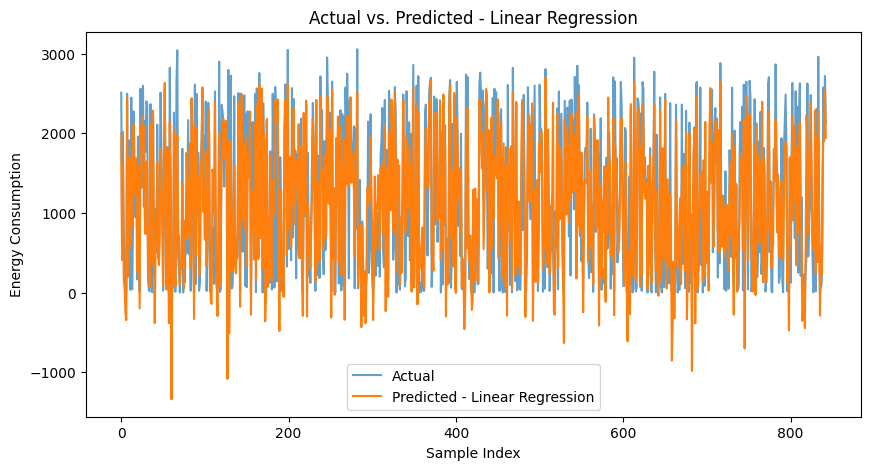

In [34]:

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred_linear, label='Predicted - Linear Regression')
plt.legend()
plt.title('Actual vs. Predicted - Linear Regression')
plt.xlabel('Sample Index')
plt.ylabel('Energy Consumption')
plt.show()


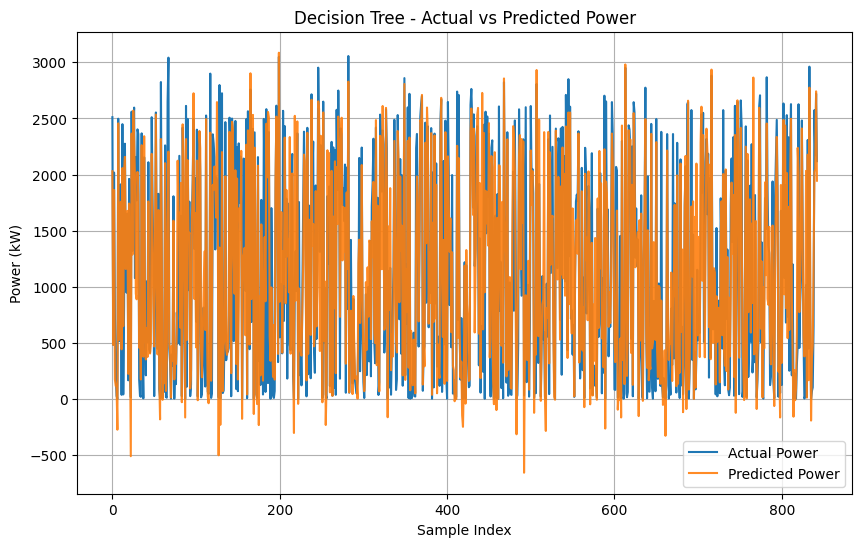

In [33]:
plt.figure(figsize=(10, 6))

plt.plot(y_test.reset_index(drop=True), label='Actual Power')

plt.plot(y_pred, label='Predicted Power')

plt.xlabel('Sample Index')
plt.ylabel('Power (kW)')
plt.title('Decision Tree - Actual vs Predicted Power')
plt.legend()
plt.grid(True)
plt.show()

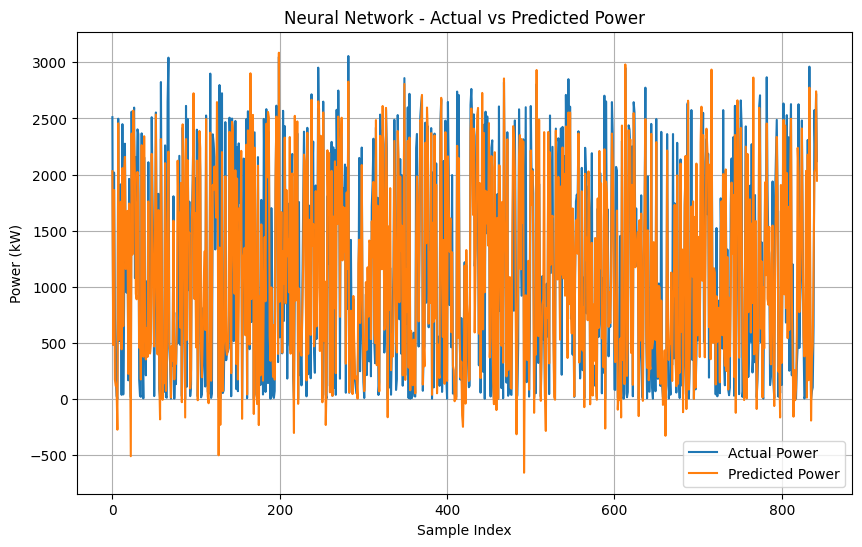

In [29]:
plt.figure(figsize=(10, 6))

plt.plot(y_test.reset_index(drop=True), label='Actual Power')

plt.plot(y_pred, label='Predicted Power')

plt.xlabel('Sample Index')
plt.ylabel('Power (kW)')
plt.title('Neural Network - Actual vs Predicted Power')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\admin2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


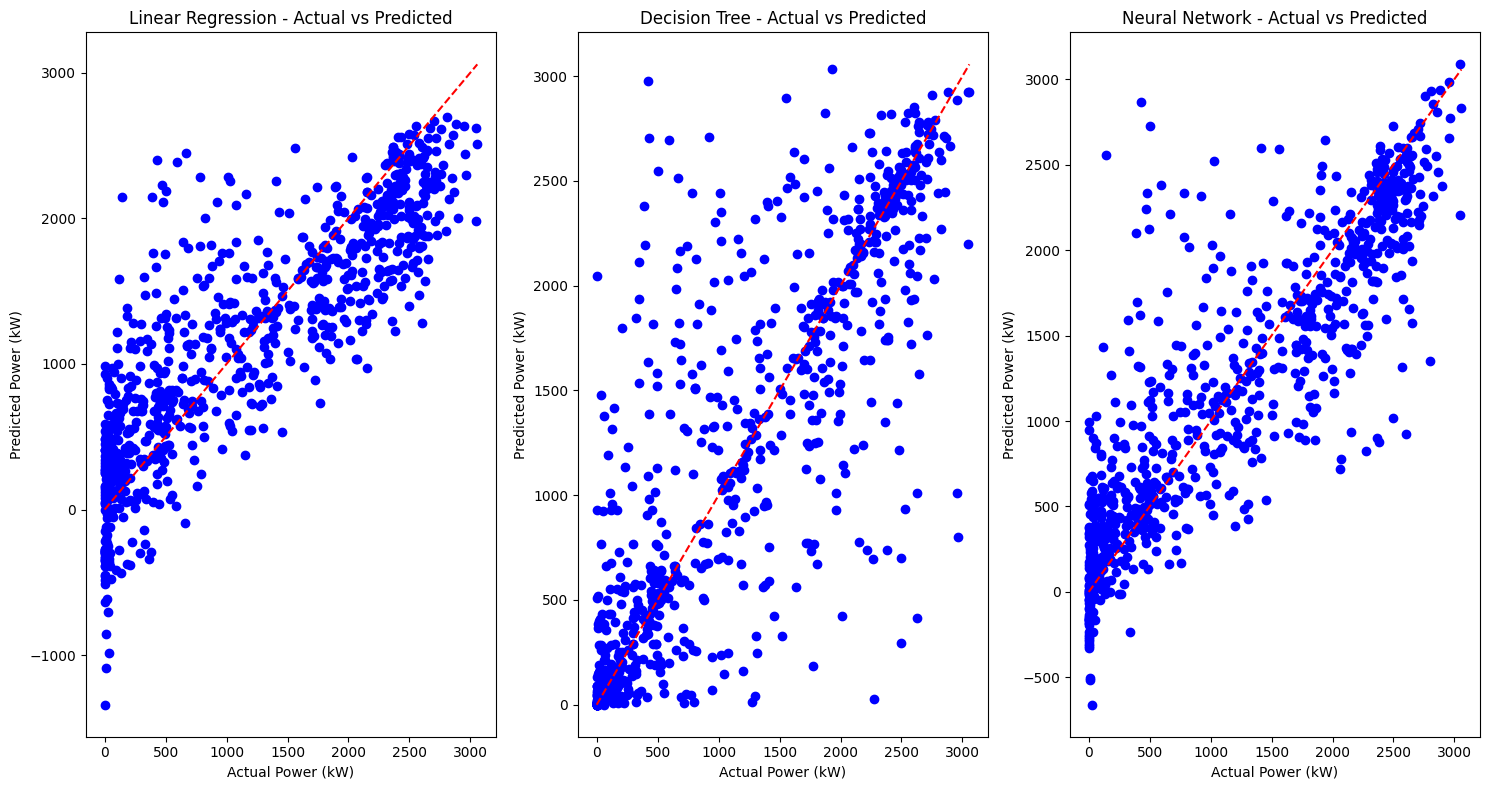

In [30]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

plt.figure(figsize=(15, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
 

    plt.subplot(1, 3, list(models.keys()).index(model_name) + 1)
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Power (kW)')
    plt.ylabel('Predicted Power (kW)')
    plt.title(f'{model_name} - Actual vs Predicted')

plt.tight_layout()
plt.show()